<a href="https://colab.research.google.com/github/GyanendraChaubey/Case-Study-Predicting-the-price-of-preowned-cars/blob/master/Project_Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Linear Regression Problem:
Predicting the Price of Pre-owned Cars

In [ ]:
#Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
#Reading data
Carsdata=pd.read_csv("/content/drive/MyDrive/cars_sampled.csv")

In [ ]:
#Create a copy of data
cars=Carsdata.copy()

In [ ]:
#Structure of the data
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          50001 non-null  object
 1   name                 50001 non-null  object
 2   seller               50001 non-null  object
 3   offerType            50001 non-null  object
 4   price                50001 non-null  int64 
 5   abtest               50001 non-null  object
 6   vehicleType          44813 non-null  object
 7   yearOfRegistration   50001 non-null  int64 
 8   gearbox              47177 non-null  object
 9   powerPS              50001 non-null  int64 
 10  model                47243 non-null  object
 11  kilometer            50001 non-null  int64 
 12  monthOfRegistration  50001 non-null  int64 
 13  fuelType             45498 non-null  object
 14  brand                50001 non-null  object
 15  notRepairedDamage    40285 non-null  object
 16  date

In [ ]:
#Summarize the data
cars.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,5.000100e+04,50001.000000,50001.000000,50001.000000,50001.000000,50001.000000
mean,6.559865e+03,2005.544229,116.496130,125613.687726,5.743725,50775.216696
std,8.581847e+04,122.991832,230.567709,40205.234483,3.711345,25743.701933
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,1067.000000
25%,1.150000e+03,1999.000000,69.000000,125000.000000,3.000000,30559.000000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,49504.000000
75%,7.190000e+03,2008.000000,150.000000,150000.000000,9.000000,71404.000000
max,1.234568e+07,9999.000000,19312.000000,150000.000000,12.000000,99998.000000


In [ ]:
pd.set_option('display.float_format',lambda x: '%.3f' %x)
cars.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,50001.000,50001.000,50001.000,50001.000,50001.000,50001.000
mean,6559.865,2005.544,116.496,125613.688,5.744,50775.217
std,85818.470,122.992,230.568,40205.234,3.711,25743.702
min,0.000,1000.000,0.000,5000.000,0.000,1067.000
25%,1150.000,1999.000,69.000,125000.000,3.000,30559.000
50%,2950.000,2003.000,105.000,150000.000,6.000,49504.000
75%,7190.000,2008.000,150.000,150000.000,9.000,71404.000
max,12345678.000,9999.000,19312.000,150000.000,12.000,99998.000


In [ ]:
#Viewing head of data
cars.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
0,30/03/2016 13:51,Zu_verkaufen,private,offer,4450,test,limousine,2003,manual,150,3er,150000,3,diesel,bmw,NaN,30/03/2016 0:00,20257,7/4/2016 4:44
1,7/3/2016 9:54,Volvo_XC90_2.4D_Summum,private,offer,13299,control,suv,2005,manual,163,xc_reihe,150000,6,diesel,volvo,no,7/3/2016 0:00,88045,26/03/2016 13:17
2,1/4/2016 0:57,Volkswagen_Touran,private,offer,3200,test,bus,2003,manual,101,touran,150000,11,diesel,volkswagen,NaN,31/03/2016 0:00,27449,1/4/2016 8:40
3,19/03/2016 17:50,Seat_Ibiza_1.4_16V_Reference,private,offer,4500,control,small car,2006,manual,86,ibiza,60000,12,petrol,seat,no,19/03/2016 0:00,34537,7/4/2016 4:44
4,16/03/2016 14:51,Volvo_XC90_D5_Aut._RDesign_R_Design_AWD_GSHD_S...,private,offer,18750,test,suv,2008,automatic,185,xc_reihe,150000,11,diesel,volvo,no,16/03/2016 0:00,55270,1/4/2016 23:18


In [ ]:
#Drop the unwanted columns
col=['name','dateCrawled','dateCreated','postalCode','lastSeen']
cars=cars.drop(columns=col,axis=1)

In [ ]:
#Tail of data
cars.tail()

,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
49996,private,request,0,test,bus,2005,NaN,0,transporter,150000,0,NaN,volkswagen,NaN
49997,private,request,19999,control,NaN,1990,NaN,0,golf,5000,0,NaN,volkswagen,NaN
49998,private,request,0,test,coupe,2004,manual,0,3er,150000,1,petrol,bmw,no
49999,commercial,offer,100,control,station wagon,2000,manual,0,megane,150000,8,petrol,renault,NaN
50000,commercial,offer,1100,test,small car,2006,manual,38,matiz,150000,10,petrol,chevrolet,no


In [ ]:
#Data Clearning
#Missing values in Data
cars.isnull().sum()

seller                    0
offerType                 0
price                     0
abtest                    0
vehicleType            5188
yearOfRegistration        0
gearbox                2824
powerPS                   0
model                  2758
kilometer                 0
monthOfRegistration       0
fuelType               4503
brand                     0
notRepairedDamage      9716
dtype: int64

1000     6
1255     1
1500     2
1910    15
1928     1
        ..
7500     1
7800     1
8500     1
8888     2
9999     7
Name: yearOfRegistration, Length: 97, dtype: int64
26
39


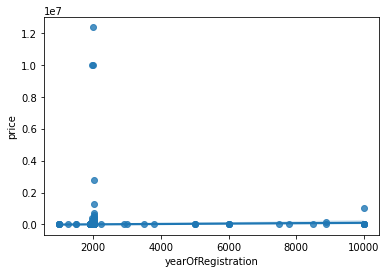

In [ ]:
#Variable yearOfRegistration
yearwise_count=cars['yearOfRegistration'].value_counts().sort_index()
print(yearwise_count)
print(sum(cars['yearOfRegistration']>2018))
print(sum(cars['yearOfRegistration']<1950))
sns.regplot(x='yearOfRegistration',y='price',scatter=True,fit_reg=True,data=cars)
#Working Range is 1950 to 2018

In [ ]:
#varibale Price
price_count = cars['price'].value_counts().sort_index()
print(price_count)


0           1451
1            172
2              1
3              1
5              4
            ... 
1250000        1
2795000        1
9999999        1
10010011       1
12345678       1
Name: price, Length: 2393, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


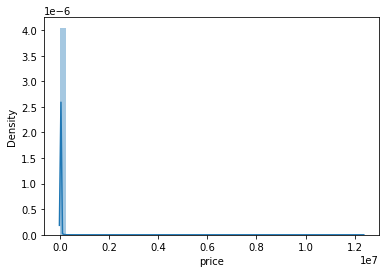

In [ ]:
sns.distplot(cars['price'])


In [ ]:
cars['price'].describe()


count      50001.000
mean        6559.865
std        85818.470
min            0.000
25%         1150.000
50%         2950.000
75%         7190.000
max     12345678.000
Name: price, dtype: float64

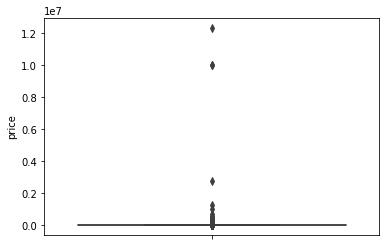

In [ ]:
sns.boxplot(y=cars['price'])


In [ ]:
print(sum(cars['price']>15000))
print(sum(cars['price']<100))
#working range

4273
1784


In [ ]:
#Varibale PowerPS
power_count = cars['powerPS'].value_counts().sort_index()
power_count

0        5605
1           3
2           2
3           2
4           4
         ... 
15033       1
16011       1
16312       1
19211       1
19312       1
Name: powerPS, Length: 460, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


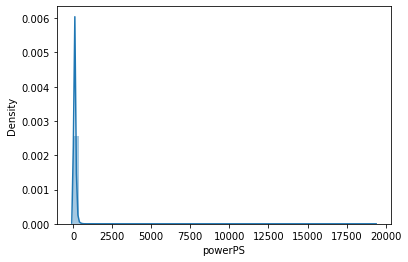

In [ ]:
sns.distplot(cars['powerPS'])

In [ ]:
cars['powerPS'].describe()

count   50001.000
mean      116.496
std       230.568
min         0.000
25%        69.000
50%       105.000
75%       150.000
max     19312.000
Name: powerPS, dtype: float64

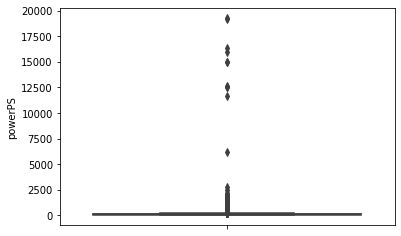

In [ ]:
sns.boxplot(y=cars['powerPS'])

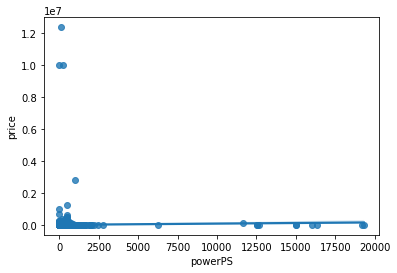

In [ ]:
sns.regplot(x='powerPS',y='price',scatter=True,fit_reg=True,data=cars)

In [ ]:
print(sum(cars['powerPS']>500))
print(sum(cars['powerPS']<30))

115
5734


In [ ]:
#Working Range of Data
cars=cars[
          (
              (cars.yearOfRegistration <=2018)
             & (cars.yearOfRegistration >=1950)
             & (cars.price >=100)
             & (cars.price<=15000)
             & (cars.powerPS>=10)
             & (cars.powerPS<=500)
          )
]
cars.shape
#-10887 records are droped

(39114, 14)

In [ ]:
#Further to simplify - variable reduction
#combining yearofRegistration and monthOfRegistration
cars['monthOfRegistration']/=12

In [ ]:
#Creating a new varibale Age by adding yearOfRegistration and MonthOfRegistration
cars['Age']=(2018-cars['yearOfRegistration'])+cars['monthOfRegistration']
cars['Age']=round(cars['Age'],2)
cars['Age'].describe()

count   39114.000
mean       15.438
std         6.726
min         0.000
25%        11.420
50%        15.500
75%        19.500
max        67.250
Name: Age, dtype: float64

In [ ]:
#Dropping yearOfRegistration and monthOfRegistration 
cars=cars.drop(columns=['yearOfRegistration','monthOfRegistration'],axis=1)

In [ ]:
#visualizing parameters

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


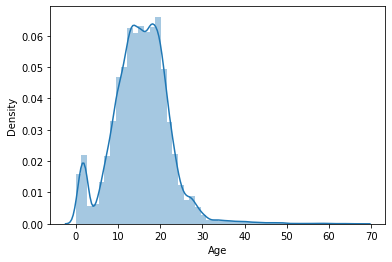

In [ ]:
#Age
sns.distplot(cars['Age'])

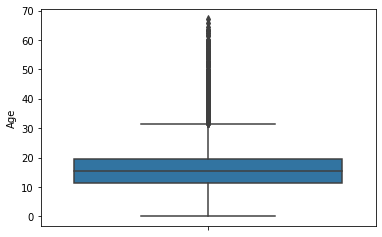

In [ ]:
sns.boxplot(y=cars['Age'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


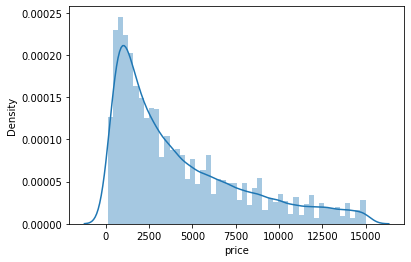

In [ ]:
#price
sns.distplot(cars['price'])

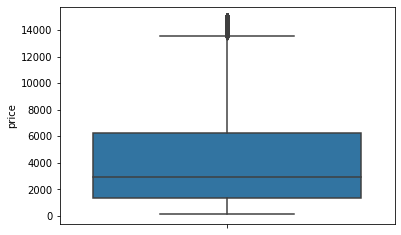

In [ ]:
sns.boxplot(y=cars['price'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


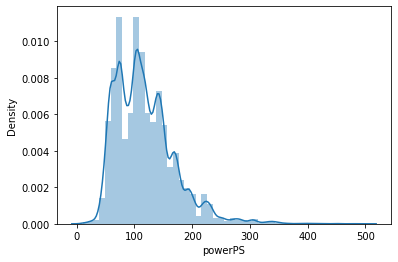

In [ ]:
#PowerPS
sns.distplot(cars['powerPS'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


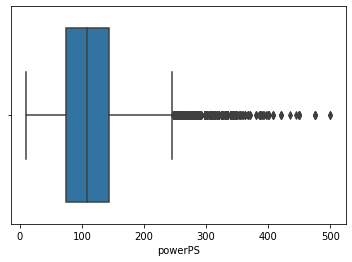

In [ ]:
sns.boxplot(cars['powerPS'])

In [ ]:
#Visualizing the paramets after norrowing working range

In [ ]:
#Age vs Price

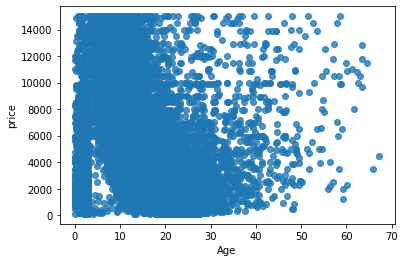

In [ ]:
sns.regplot(x='Age',y='price',scatter=True,fit_reg=False,data=cars)

From above fig we can observe that increasing age, price decreases however some cars are placed higher with increase

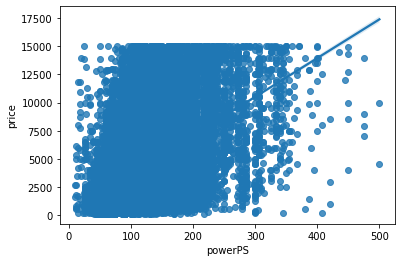

In [ ]:
#PowerPS vs Price
sns.regplot(x='powerPS',y='price',scatter=True,fit_reg=True,data=cars)

In [ ]:
#Variable Seller
cars['seller'].value_counts()

private       39113
commercial        1
Name: seller, dtype: int64

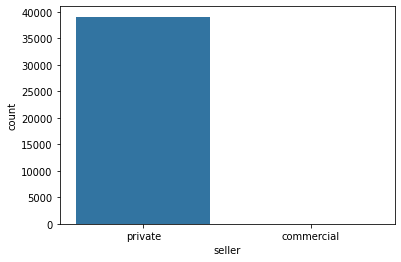

In [ ]:
pd.crosstab(cars['seller'],columns='count',normalize=True)
sns.countplot(x='seller',data=cars)

Beacuse almost all the vehicles are of private type thats why it is not going to effect the price much 

In [ ]:
#Variable OfferType
cars['offerType'].value_counts()

offer    39114
Name: offerType, dtype: int64

Because offertype is same for all the vehicles thats why it is going impact  the price with same intensity

In [ ]:
#Variable abtest
cars['abtest'].value_counts()

test       20208
control    18906
Name: abtest, dtype: int64

Both type have equal numbers of cars thats why not very  much effect on price

In [ ]:
#Variable vehicleType
cars['vehicleType'].value_counts()

limousine        10768
small car         9261
station wagon     7449
bus               3264
cabrio            2254
coupe             1721
suv               1252
others             318
Name: vehicleType, dtype: int64

In [ ]:
#variable gearbox
cars['gearbox'].value_counts()

manual       31099
automatic     7245
Name: gearbox, dtype: int64

In [ ]:
#Variable model
cars['model'].value_counts()

golf          3246
others        2553
3er           2306
polo          1503
corsa         1402
              ... 
serie_2          1
200              1
elefantino       1
b_max            1
amarok           1
Name: model, Length: 243, dtype: int64

In [ ]:
#variable kilometer
cars['kilometer'].value_counts()

150000    26809
125000     4220
100000     1606
90000      1240
80000      1123
70000       928
60000       801
50000       660
40000       488
30000       424
5000        379
20000       354
10000        82
Name: kilometer, dtype: int64

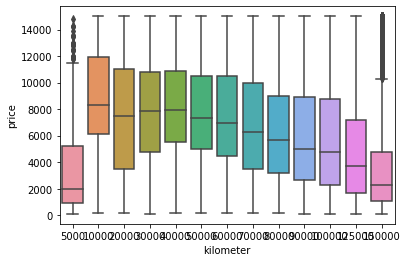

In [ ]:
sns.boxplot(x='kilometer',y='price',data=cars)

In [ ]:
#variable fuelType
cars['fuelType'].value_counts()

petrol     24939
diesel     10858
lpg          677
cng           71
hybrid        20
electro        9
other          5
Name: fuelType, dtype: int64

In [ ]:
#Variable brand
cars['brand'].value_counts()

volkswagen        8486
opel              4447
bmw               4173
mercedes_benz     3495
audi              3251
ford              2698
renault           1924
peugeot           1312
fiat               986
seat               841
skoda              642
mazda              636
smart              622
citroen            588
nissan             572
toyota             523
volvo              395
hyundai            381
mini               367
mitsubishi         353
honda              292
suzuki             259
kia                253
alfa_romeo         243
sonstige_autos     211
chevrolet          198
chrysler           146
dacia              124
subaru             103
jeep                69
daihatsu            67
porsche             65
saab                64
lancia              55
jaguar              55
daewoo              53
rover               51
land_rover          49
trabant             43
lada                22
Name: brand, dtype: int64

In [ ]:
#variable notRepairedDamage
cars['notRepairedDamage'].value_counts()

no     29035
yes     3971
Name: notRepairedDamage, dtype: int64

In [ ]:
#Remove Insignificant variables
col=['seller','offerType','abtest']
cars=cars.drop(columns=col,axis=1)
cars_copy=cars.copy()

In [ ]:
cars_copy.head()

,price,vehicleType,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,Age
0,4450,limousine,manual,150,3er,150000,diesel,bmw,NaN,15.250
1,13299,suv,manual,163,xc_reihe,150000,diesel,volvo,no,13.500
2,3200,bus,manual,101,touran,150000,diesel,volkswagen,NaN,15.920
3,4500,small car,manual,86,ibiza,60000,petrol,seat,no,13.000
5,988,limousine,manual,90,passat,150000,petrol,volkswagen,no,23.170


In [ ]:
#Correlation
cars_select1=cars.select_dtypes(exclude=[object])

In [ ]:
cars_select1

,price,powerPS,kilometer,Age
0,4450,150,150000,15.250
1,13299,163,150000,13.500
2,3200,101,150000,15.920
3,4500,86,60000,13.000
5,988,90,150000,23.170
...,...,...,...,...
49991,10900,231,150000,14.670
49992,790,82,150000,20.750
49993,830,60,125000,19.670
49995,2290,101,150000,17.250


In [ ]:
correlation=cars_select1.corr()

In [ ]:
round(correlation,3)

,price,powerPS,kilometer,Age
price,1.000,0.478,-0.333,-0.406
powerPS,0.478,1.000,0.145,-0.076
kilometer,-0.333,0.145,1.000,0.221
Age,-0.406,-0.076,0.221,1.000


In [ ]:
cars_select1.corr().loc[:,'price'].abs().sort_values(ascending=False)[1:]

powerPS     0.478
Age         0.406
kilometer   0.333
Name: price, dtype: float64

In [ ]:
#Dropping missing values
cars_omit=cars.dropna(axis=0)

In [ ]:
cars.isnull().sum()

price                   0
vehicleType          2827
gearbox               770
powerPS                 0
model                1558
kilometer               0
fuelType             2535
brand                   0
notRepairedDamage    6108
Age                     0
dtype: int64

In [ ]:
cars_omit.isnull().sum()

price                0
vehicleType          0
gearbox              0
powerPS              0
model                0
kilometer            0
fuelType             0
brand                0
notRepairedDamage    0
Age                  0
dtype: int64

In [ ]:
cars_omit.head()

,price,vehicleType,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,Age
1,13299,suv,manual,163,xc_reihe,150000,diesel,volvo,no,13.500
3,4500,small car,manual,86,ibiza,60000,petrol,seat,no,13.000
5,988,limousine,manual,90,passat,150000,petrol,volkswagen,no,23.170
7,1399,coupe,manual,136,clk,150000,petrol,mercedes_benz,no,21.920
8,4680,station wagon,manual,122,vectra,150000,petrol,opel,no,14.000


In [ ]:
#Converting the categorical variable into dummy variables
cars_omit=pd.get_dummies(cars_omit,drop_first=True)

In [ ]:
cars_omit.shape

(29565, 297)

## Model Building with Omitted Data

In [ ]:
#Seperating the input and output features
x1=cars_omit.drop(['price'],axis='columns',inplace=False)
y1=cars_omit['price']

In [ ]:
y1.shape

(29565,)

In [ ]:
x1.shape

(29565, 296)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbb84780f50>,
      dtype=object)

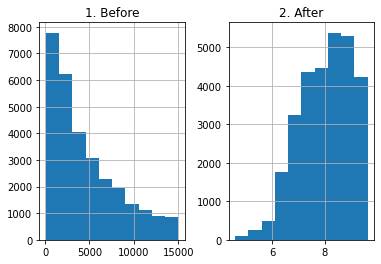

In [ ]:
#Plotting the variable price
prices=pd.DataFrame({"1. Before":y1,"2. After":np.log(y1)})
prices.hist()

In [ ]:
#Transforming price as a logarithmic value
y1=np.log(y1)

In [ ]:
#Splitting the data into training and testing
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.3,random_state=3)
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(20695, 296) (8870, 296)
(20695,) (8870,)


In [ ]:
#Baseline model for omitted data
base_pred=np.mean(y_test)
print(base_pred)

8.022465010016246


In [ ]:
base_pred=pd.Series([8.022]*8870)

In [ ]:
mean_squared_error(y_test,base_pred)

0.9675899543763141

In [ ]:
base_root_mean_square_error=np.sqrt(mean_squared_error(y_test,base_pred))
print(base_root_mean_square_error)

0.9836615039617613


In [ ]:
#Linear Regression Model with Omitted Values
#Setting Intercept as True
lgr=LinearRegression(fit_intercept=True)

In [ ]:
#Model
model1=lgr.fit(x_train,y_train)

In [ ]:
#Predicting the model on test data
cars_pred1=lgr.predict(x_test)

In [ ]:
#Compute MSE and RMSE
lin_mse1=mean_squared_error(y_test,cars_pred1)
lin_rmse1=np.sqrt(lin_mse1)
print(lin_rmse1)

0.5215835065119963


In [ ]:
#R squared value
r2_lin_test1=model1.score(x_test,y_test)
r2_lin_train1=model1.score(x_train,y_train)
print(r2_lin_test1,r2_lin_train1)

0.7188381154312894 0.7210427117224386


count   8870.000
mean      -0.003
std        0.522
min       -4.582
25%       -0.257
50%        0.038
75%        0.282
max        5.226
Name: price, dtype: float64

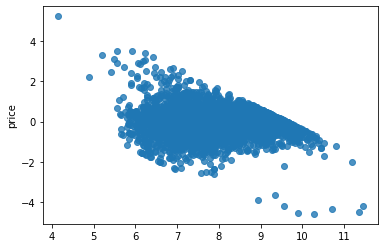

In [ ]:
#Regression diagnostics - Residual Plot Analysis
residuals1=y_test-cars_pred1
sns.regplot(x=cars_pred1,y=residuals1,scatter=True,fit_reg=False)
residuals1.describe()

In [ ]:
y_test[25827]

8.160518247477505

In [ ]:
x_test[0:1]

,powerPS,kilometer,Age,vehicleType_cabrio,vehicleType_coupe,vehicleType_limousine,vehicleType_others,vehicleType_small car,vehicleType_station wagon,vehicleType_suv,gearbox_manual,model_147,model_156,model_159,model_1_reihe,model_1er,model_200,model_2_reihe,model_300c,model_3_reihe,model_3er,model_4_reihe,model_500,model_5_reihe,model_5er,model_601,model_6_reihe,model_6er,model_7er,model_80,model_850,model_90,model_900,model_9000,model_911,model_a1,model_a2,model_a3,model_a4,model_a5,...,fuelType_petrol,brand_audi,brand_bmw,brand_chevrolet,brand_chrysler,brand_citroen,brand_dacia,brand_daewoo,brand_daihatsu,brand_fiat,brand_ford,brand_honda,brand_hyundai,brand_jaguar,brand_jeep,brand_kia,brand_lada,brand_lancia,brand_land_rover,brand_mazda,brand_mercedes_benz,brand_mini,brand_mitsubishi,brand_nissan,brand_opel,brand_peugeot,brand_porsche,brand_renault,brand_rover,brand_saab,brand_seat,brand_skoda,brand_smart,brand_subaru,brand_suzuki,brand_toyota,brand_trabant,brand_volkswagen,brand_volvo,notRepairedDamage_yes
25827,101,125000,15.330,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
lgr.predict(x_test[0:1])

array([7.98720393])

In [ ]:
residual=y_test[25827]-lgr.predict(x_test[0:1])
residual

array([0.17331432])

##Model Training with Imputing Missing Values

In [ ]:
cars_imputed=cars.apply(lambda x:x.fillna(x.median()) if x.dtype=='float' else x.fillna(x.value_counts().index[0]))

In [ ]:
cars_imputed.isnull().sum()

price                0
vehicleType          0
gearbox              0
powerPS              0
model                0
kilometer            0
fuelType             0
brand                0
notRepairedDamage    0
Age                  0
dtype: int64

In [ ]:
cars.shape

(39114, 10)

In [ ]:
cars_imputed.shape

(39114, 10)

In [ ]:
cars_imputed=pd.get_dummies(cars_imputed,drop_first=True)

In [ ]:
#Seprate the input and output features
x2=cars_imputed.drop(['price'],axis='columns',inplace=False)
y2=cars_imputed['price']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbb84140a90>,
      dtype=object)

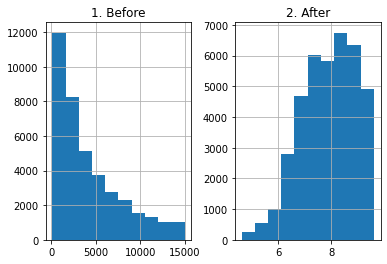

In [ ]:
#Plotting the variable price
prices = pd.DataFrame({'1. Before':y2, '2. After':np.log(y2)})
prices.hist()

In [ ]:
#Transformation price as a Logarithmic value
y2=np.log(y2)

In [ ]:
#splitting data into test and train
x_train1, x_test1, y_train1, y_test1 = train_test_split(x2,y2,test_size=0.3,random_state=3)
print(x_train1.shape,x_test1.shape)
print(y_train1.shape,y_test1.shape)

(27379, 299) (11735, 299)
(27379,) (11735,)


In [ ]:
#finding the mean for the test data value
base_pred=np.mean(y_test1)
print(base_pred)

7.895563939995915


In [ ]:
#Repeat the same value till length of test data
base_pred=np.repeat(base_pred,len(y_test1))

In [ ]:
#Finding the RMSE
base_root_mean_square_error_imputed=np.sqrt(mean_squared_error(y_test1,base_pred))

In [ ]:
#Linear Regression with Imputed Data
lgr2 = LinearRegression(fit_intercept=True)

In [ ]:
#model2
model2=lgr2.fit(x_train1,y_train1)

In [ ]:
#Predicting model on test set
cars_pred2=lgr2.predict(x_test1)

In [ ]:
#Compute the MSE and RMSE
lin_mse2=mean_squared_error(y_test1,cars_pred2)
lin_rmse2=np.sqrt(lin_mse2)
print(lin_rmse2)

0.6325871160656529


In [ ]:
#R - squared error
r2_lin_test2=model2.score(x_test1,y_test1)
r2_lin_train2=model2.score(x_train1,y_train1)
print(r2_lin_test2,r2_lin_train2)

0.6280547805127432 0.6301315346861612


count   11735.000
mean        0.002
std         0.633
min        -5.575
25%        -0.321
50%         0.061
75%         0.399
max         5.092
Name: price, dtype: float64

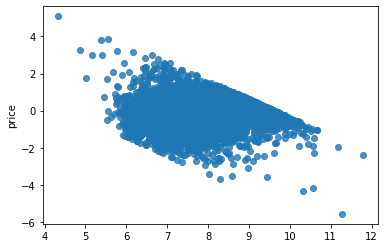

In [ ]:
#Regression diagnostics - Residual Plot Analysis
residuals2=y_test1-cars_pred2
sns.regplot(x=cars_pred2,y=residuals2,scatter=True,fit_reg=False)
residuals2.describe()